### Carga de Librerías y Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [ ]:
#cargar los datos desde scikit-Learn
from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
#Transformar el dataset en un DataFrame ordenado
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Añadir columna de datos de Precio de hogares
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Limipiar datos erroneos: vacios o nulos
boston_df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Exploración de Datos


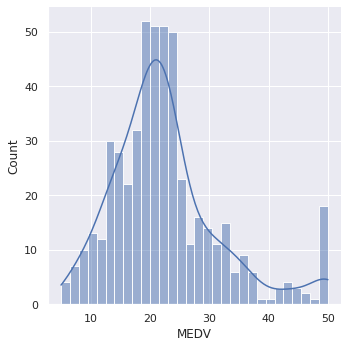

In [ ]:
sns.set(rc= {'figure.figsize': (30,15)})
sns.displot(boston_df['MEDV'], bins = 30, kde = True)
plt.show()

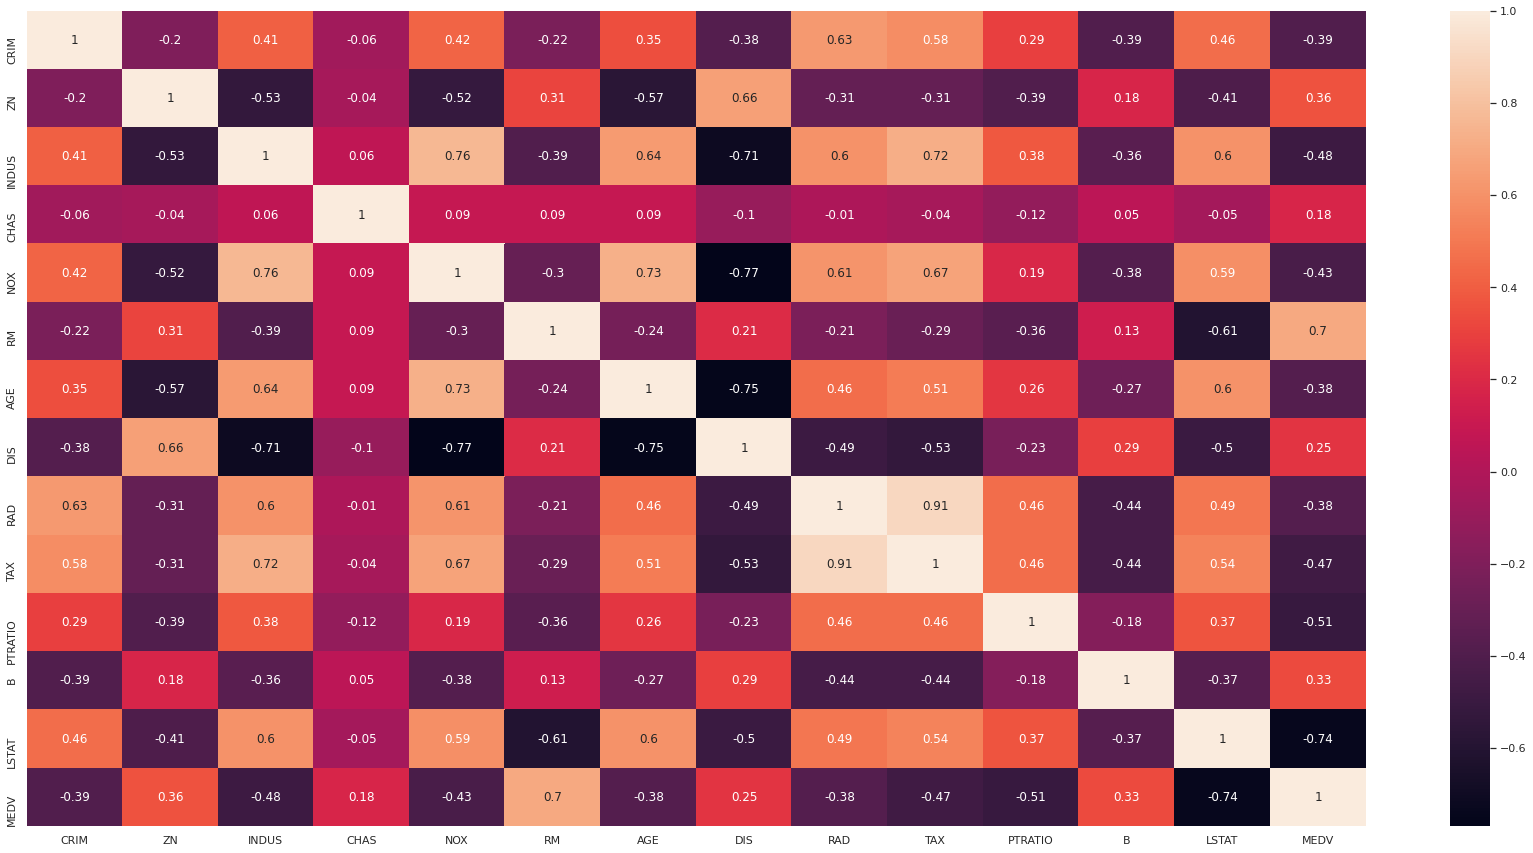

In [ ]:
#Matriz de Correlación
matriz_corr = boston_df.corr().round(2)
sns.heatmap(data=matriz_corr, annot= True);

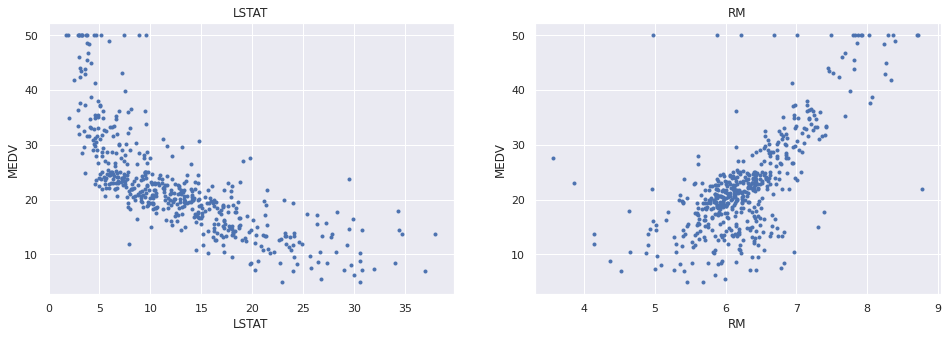

In [ ]:
#Gráficas de LSTAT/MEDV y RM/MEDV

plt.figure(figsize=(16,5))

atributos = ['LSTAT', 'RM']
objetivo = boston_df['MEDV']

for i, col in enumerate(atributos):
  plt.subplot(1,len(atributos), i+1)
  x=boston_df[col]
  y=objetivo

  plt.scatter(x,y,marker='.')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

###Preprocesamiento de datos de entrenamiento y testeo

In [ ]:
#dividir los conjuntos en X e y (entradas y salidas)
X = pd.DataFrame(np.c_[boston_df['LSTAT']], columns= ['LSTAT'])
y = boston_df['MEDV']
print(X.shape,y.shape)

(506, 1) (506,)


In [ ]:
#Dividir en COnjuntos de Entrenamiento y Testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

print("Entrenamiento: X = {}, y = {}".format(X_train.shape, y_train.shape))
print("Testeo: X = {}, y = {}".format(X_test.shape, y_test.shape))

Entrenamiento: X = (404, 1), y = (404,)
Testeo: X = (102, 1), y = (102,)


###Creación del Modelo

In [ ]:
#Creación del modelo de regresión lineal y ejecutar el entrenamiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression() #Hipotesis
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Evaluar el modelo Entrenamiento

y_train_predicted = modelo.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2 = r2_score(y_train, y_train_predicted)

print("Rendicmiento en entrenamiento")
print("RMSE: {}".format(rmse))
print("R2 : {}".format(r2))

Rendicmiento en entrenamiento
RMSE: 6.0990324041640065
R2 : 0.542497603066411


In [ ]:
#Evaluar el modelo Testeo

y_test_predicted = modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2 = r2_score(y_test, y_test_predicted)

print("Rendicmiento en testeo")
print("RMSE: {}".format(rmse))
print("R2 : {}".format(r2))

Rendicmiento en testeo
RMSE: 6.627205229593623
R2 : 0.5453164888101072


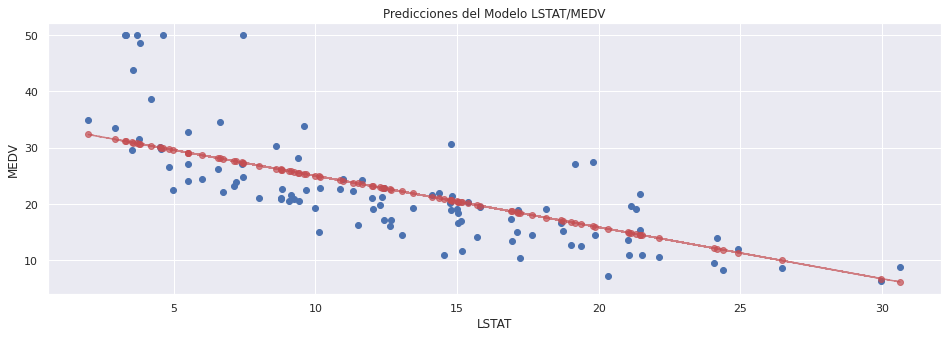

In [ ]:
#Gráfico ordenado por el modelo

plt.figure(figsize=(16,5))

plt.plot(X_test, y_test_predicted, linestyle = "--", marker="o", alpha = 0.7, color="r", label= "Predicciones")
plt.scatter(X_test, y_test, marker="o")
plt.title('Predicciones del Modelo LSTAT/MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show();

### Resultados RM/MEDV

Rendicmiento en entrenamiento
RMSE: 6.496186700993456
R2 : 0.48097474754328506
Rendicmiento en testeo
RMSE: 7.028985306408696
R2 : 0.48851413530919574


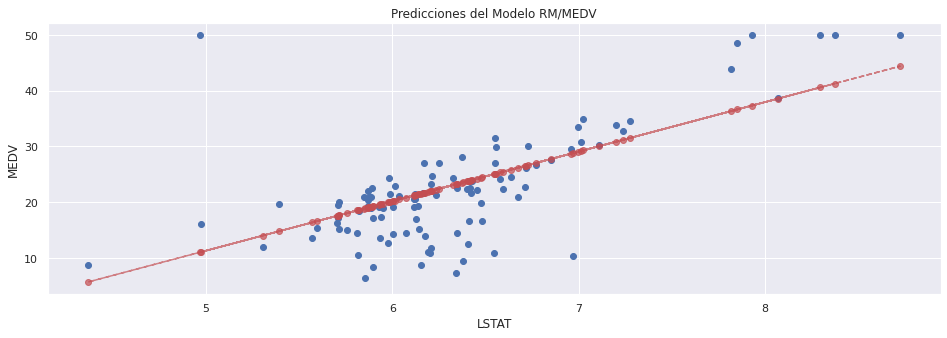

In [ ]:
#dividir los conjuntos en X e y (entradas y salidas)
X = pd.DataFrame(np.c_[boston_df['RM']], columns= ['RM'])
y = boston_df['MEDV']

#Dividir en COnjuntos de Entrenamiento y Testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

#Creación del modelo de regresión lineal y ejecutar el entrenamiento
modelo_rm = LinearRegression() #Hipotesis
modelo_rm.fit(X_train, y_train)

#Evaluar el modelo Entrenamiento

y_train_predicted = modelo_rm.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2 = r2_score(y_train, y_train_predicted)

print("Rendicmiento en entrenamiento")
print("RMSE: {}".format(rmse))
print("R2 : {}".format(r2))

#Evaluar el modelo Testeo

y_test_predicted = modelo_rm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2 = r2_score(y_test, y_test_predicted)

print("Rendicmiento en testeo")
print("RMSE: {}".format(rmse))
print("R2 : {}".format(r2))


#Gráfico ordenado por el modelo

plt.figure(figsize=(16,5))

plt.plot(X_test, y_test_predicted, linestyle = "--", marker="o", alpha = 0.7, color="r", label= "Predicciones")
plt.scatter(X_test, y_test, marker="o")
plt.title('Predicciones del Modelo RM/MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show();

###Comparación entre distintas Hipótesis

In [ ]:
def probar(tipo_hipotesis, X_train, y_train, X_test, y_test):
  #Creación del modelo de regresión lineal y ejecutar el entrenamiento
  modelo = tipo_hipotesis
  modelo.fit(X_train, y_train)

  #Evaluar el modelo Entrenamiento

  y_train_predicted = modelo.predict(X_train)
  rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2 = r2_score(y_train, y_train_predicted)

  print("Rendicmiento en entrenamiento")
  print("RMSE: {}".format(rmse))
  print("R2 : {}".format(r2))

  #Evaluar el modelo Testeo

  y_test_predicted = modelo.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
  r2 = r2_score(y_test, y_test_predicted)

  print("Rendicmiento en testeo")
  print("RMSE: {}".format(rmse))
  print("R2 : {}".format(r2))


  #Gráfico ordenado por el modelo
  
  modelo_desordenado = pd.DataFrame(np.c_[X_test, y_test_predicted], columns= ['RM', 'MEDV_'])
  modelo_ordenado = modelo_desordenado.sort_values(by= 'RM', ascending = True)

  plt.figure(figsize=(16,5))

  plt.plot(modelo_ordenado['RM'], modelo_ordenado['MEDV_'], linestyle = "--", marker="o", alpha = 0.7, color="r", label= "Predicciones")
  plt.scatter(X_test, y_test, marker="o")
  plt.title('Predicciones del Modelo RM/MEDV')
  plt.xlabel('RM')
  plt.ylabel('MEDV')
  plt.show();


Modelo Lasso
Rendicmiento en entrenamiento
RMSE: 6.649575618575043
R2 : 0.4561747721001662
Rendicmiento en testeo
RMSE: 7.315604617726738
R2 : 0.445950182720949


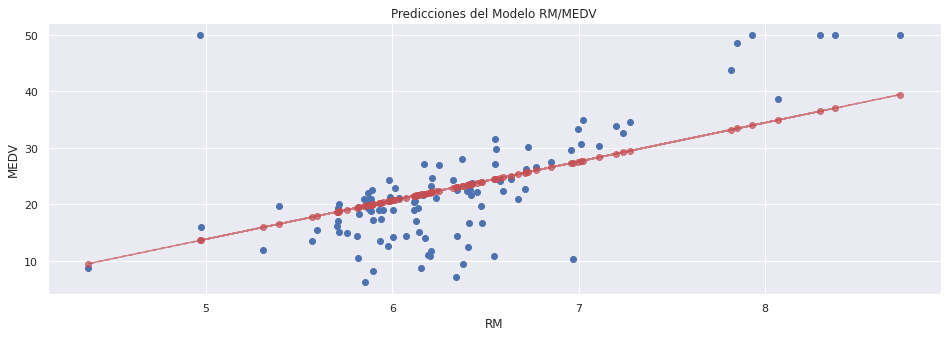

In [ ]:
from sklearn.linear_model import Lasso

print("Modelo Lasso")
probar(Lasso(), X_train, y_train, X_test, y_test)

Modelo ARD
Rendicmiento en entrenamiento
RMSE: 6.496208282692287
R2 : 0.48097129891540324
Rendicmiento en testeo
RMSE: 7.030815118648028
R2 : 0.48824779674788554


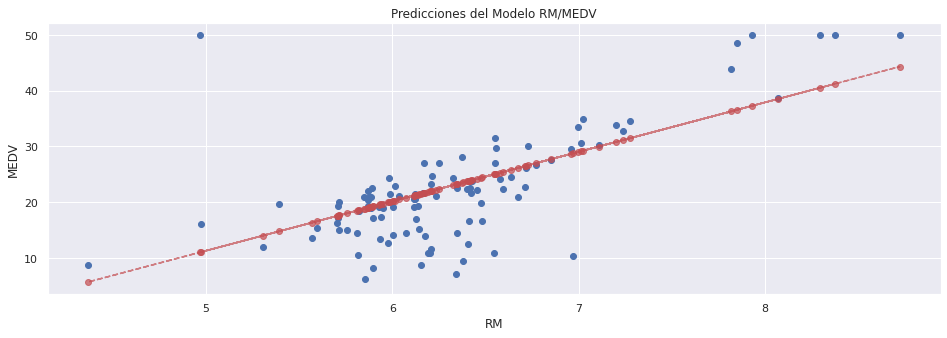

In [ ]:
from sklearn.linear_model import ARDRegression

print("Modelo ARD")
probar(ARDRegression(), X_train, y_train, X_test, y_test)

Modelo SVM
Rendicmiento en entrenamiento
RMSE: 6.070463298361822
R2 : 0.5467736328477779
Rendicmiento en testeo
RMSE: 7.0887543528535435
R2 : 0.4797785932041906


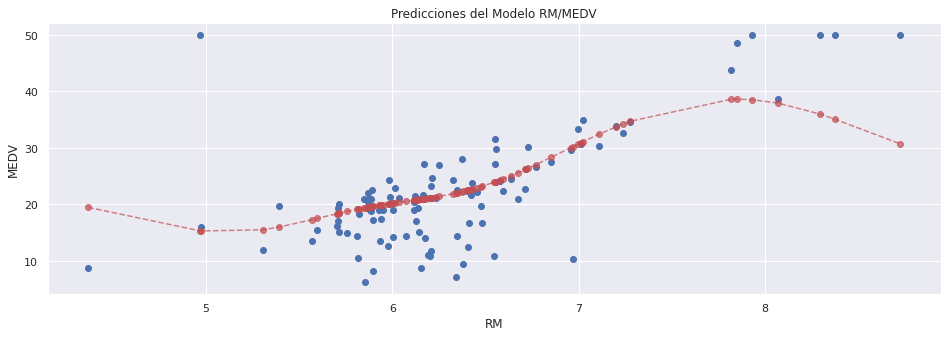

In [ ]:
from sklearn.svm import SVR

print("Modelo SVM")
probar(SVR(), X_train, y_train, X_test, y_test)

Modelo DTR
Rendicmiento en entrenamiento
RMSE: 1.9921380126352035
R2 : 0.9511898281020502
Rendicmiento en testeo
RMSE: 7.142543760632414
R2 : 0.47185376886997765


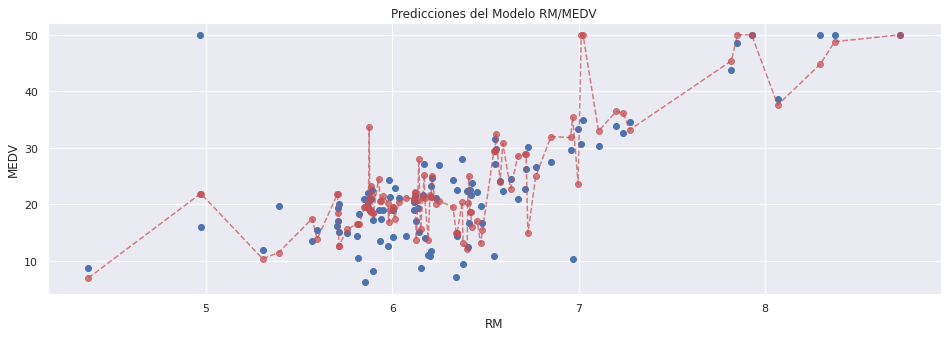

In [ ]:
from sklearn.tree import DecisionTreeRegressor

print("Modelo DTR")
probar(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

Modelo SVM
Rendicmiento en entrenamiento
RMSE: 5.097010189443134
R2 : 0.6804767273000398
Rendicmiento en testeo
RMSE: 6.60842896105673
R2 : 0.5478892673743521


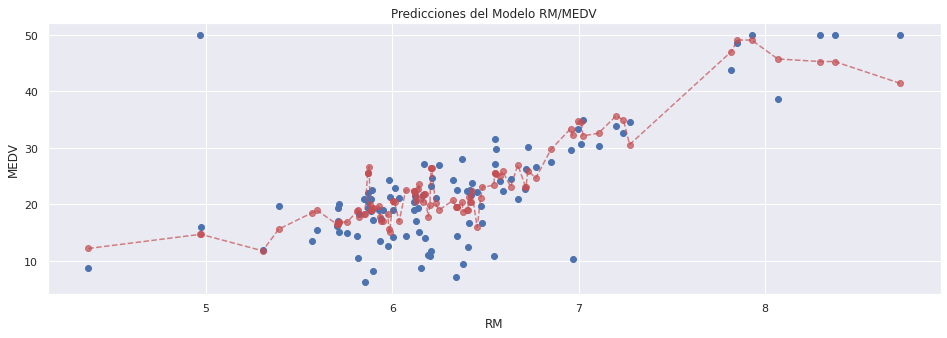

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

print("Modelo SVM")
probar(KNeighborsRegressor(), X_train, y_train, X_test, y_test)

Modelo GBR
Rendicmiento en entrenamiento
RMSE: 4.355119567840398
R2 : 0.7667231415882627
Rendicmiento en testeo
RMSE: 6.39880294136344
R2 : 0.5761171586914402


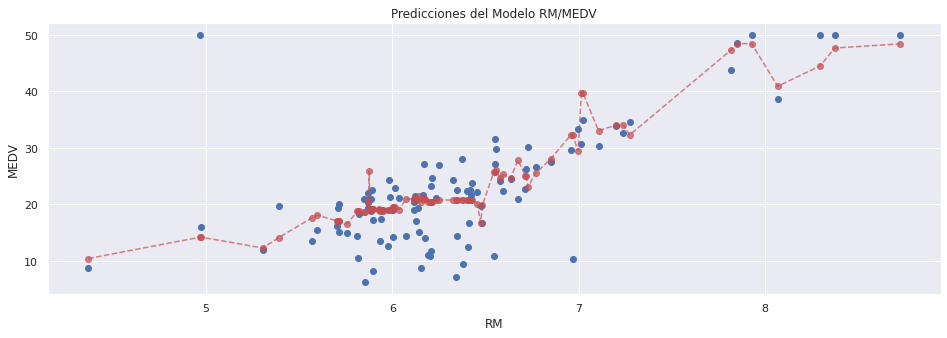

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

print("Modelo GBR")
probar(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

Modelo ABR
Rendicmiento en entrenamiento
RMSE: 5.388766999154105
R2 : 0.6428502882495783
Rendicmiento en testeo
RMSE: 6.852671122911532
R2 : 0.513852402237158


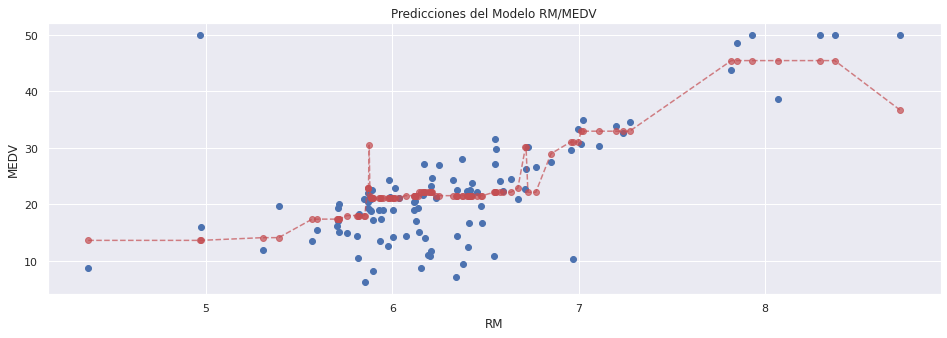

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

print("Modelo ABR")
probar(AdaBoostRegressor(), X_train, y_train, X_test, y_test)

In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_val_score

modelos = {}
modelos['LR_'] = LinearRegression()
modelos['LAS'] = Lasso()
modelos['SVM'] = SVR()
modelos['DTR'] = DecisionTreeRegressor()
modelos['KNN'] = KNeighborsRegressor()
modelos['GBR'] = GradientBoostingRegressor()
modelos['ADA'] = AdaBoostRegressor()

resultados_modelos = []
print("Modelos\t\t Mean \t\t STD")

for modelo_a_probar in modelos:
  resultados = cross_val_score(modelos[modelo_a_probar], X_train, y_train, scoring = 'neg_mean_squared_error')
  resultados_modelos.append(resultados)

  print("{}\t\t: {}\t {}".format(modelo_a_probar, round(resultados.mean(),3), round(resultados.std(),3)))

Modelos		 Mean 		 STD
LR_		: -43.028	 11.938
LAS		: -44.791	 9.819
SVM		: -39.069	 7.385
DTR		: -71.634	 10.16
KNN		: -40.891	 8.754
GBR		: -42.924	 6.803
ADA		: -40.093	 11.886


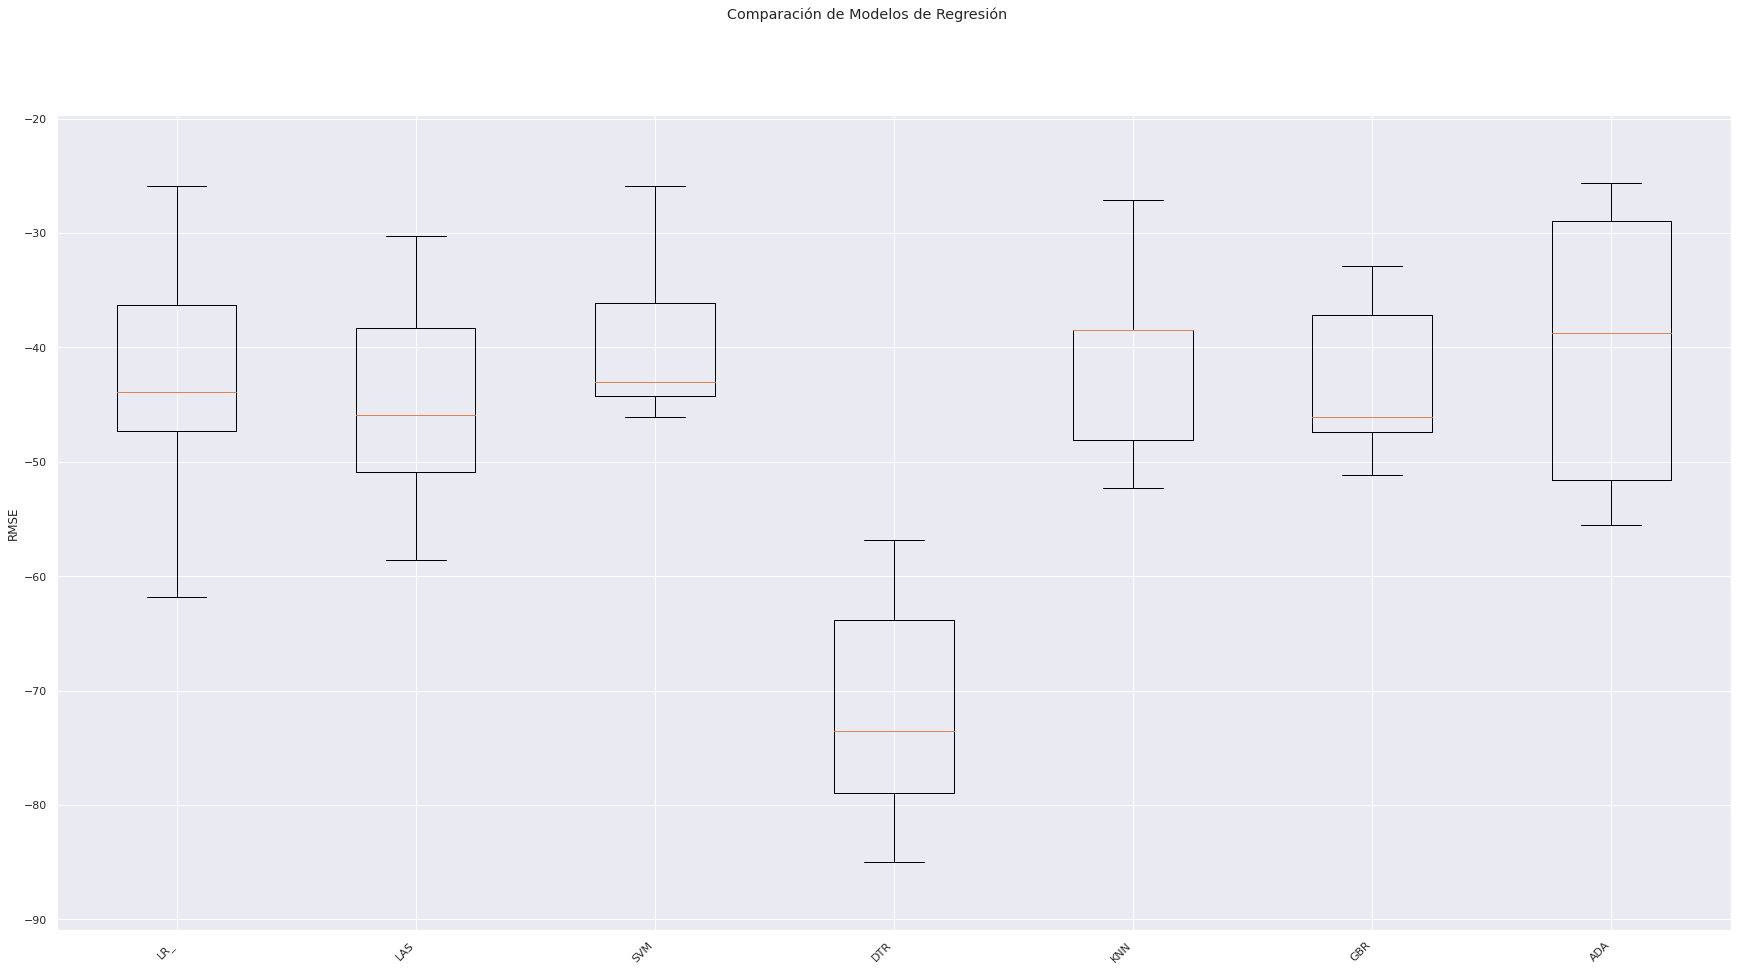

In [ ]:
#Gráfica de comprarción de Modelos

figura = plt.figure()
figura.suptitle('Comparación de Modelos de Regresión')
ejes = figura.add_subplot(111)

plt.boxplot(resultados_modelos)
ejes.set_xticklabels(modelos, rotation = 45, ha= "right")
ejes.set_ylabel("RMSE")
plt.margins(0.05,0.1)
plt.show()